In [74]:
import os
import pandas as pd
import geopandas as gpd
from os.path import join as pjoin
from cartoframes.viz import Map, Layer, color_continuous_style

In [60]:
sorted(os.listdir('../prepdata'))

['A-traffic-link.csv',
 'LTE_coarse_grid_1000.geojson',
 'LTE_fine_grid_200.geojson',
 'coarse_grained_lte.h5',
 'fine_grained_lte.h5',
 'totalbound_LTE_coarse_grid_1000.geojson',
 'totalbound_LTE_fine_grid_200.geojson',
 'traffic-volume-A-20180101-20190101',
 'traffic-volume-A-20180101-20190101.csv',
 'traffic-volume-A-20180101-20190101.df']

In [12]:
pdir = '../prepdata'

In [71]:
sensor_df = pd.read_csv(pjoin(pdir, 'A-traffic-link.csv'), index_col=0)
sensor_gdf = gpd.GeoDataFrame(
    sensor_df, geometry=gpd.points_from_xy(x=sensor_df['경도'], y=sensor_df['위도'])
)
sensor_gdf.crs = 'EPSG:4326'

In [20]:
coarse_gdf = gpd.read_file(pjoin(pdir, 'LTE_coarse_grid_1000.geojson'))
fine_gdf = gpd.read_file(pjoin(pdir, 'LTE_fine_grid_200.geojson'))

In [44]:
coarse_df = pd.read_hdf(pjoin(pdir, 'coarse_grained_lte.h5'))
fine_df = pd.read_hdf(pjoin(pdir, 'fine_grained_lte.h5'))

coarse_df.fillna(0, inplace=True)
fine_df.fillna(0, inplace=True)


In [56]:
coarse_gdf['val'] = coarse_df.mean(0).values
fine_gdf['val'] = fine_df.mean(0).values

In [76]:
Map([
    Layer(coarse_gdf, color_continuous_style('val')),
    Layer(sensor_gdf),
])


In [78]:
Map([
    Layer(fine_gdf, color_continuous_style('val')),
    Layer(sensor_gdf),
])


In [83]:
fine_df.iloc[0]

0,0      1226.883868
0,1      2488.521966
0,2      1966.959948
0,3      6988.422713
0,4      2977.021899
            ...     
29,28    3155.707786
29,29    2241.208284
29,30    2262.208969
29,31    1948.187338
29,32    1413.043146
Name: 2018-01-01 00:00:00, Length: 990, dtype: float64

In [86]:
import matplotlib.pyplot as plt

60665.16533895023

array([[1226.88386811, 2488.52196561, 1966.95994772, ..., 2262.208969  ,
        1948.18733781, 1413.04314649],
       [1230.73970053, 2441.54501742, 2022.0096243 , ..., 2285.77966633,
        1848.17487318, 1394.81196302],
       [1240.761542  , 2482.72823391, 2093.433556  , ..., 2256.65174528,
        1845.47099709, 1387.97251146],
       ...,
       [ 803.79835354, 4179.13940722, 2925.31205205, ..., 4229.51366755,
         995.0422373 , 1410.43631192],
       [ 794.25229642, 4355.93023955, 3073.12716324, ..., 4023.37631919,
        1036.87619875, 1398.93751614],
       [ 735.42819037, 3702.73469146, 3283.99785995, ..., 2990.92378096,
        1353.3869158 , 1460.18286839]])

In [111]:
import numpy as np

In [141]:
wkdy = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [194]:
dt = fine_df.index[i]
dt.strftime("%Y/%m/%d, %HH")

'2018/01/07, 23H'

<Figure size 576x576 with 0 Axes>

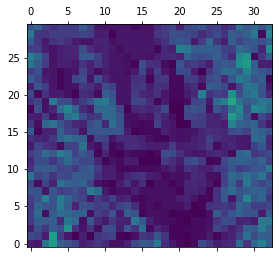

In [225]:
fig = plt.figure(figsize=(8,8), facecolor='blue')
plt.matshow(arr[i], vmin=arr.min(), vmax=arr.max())
plt.gca().invert_yaxis()
plt.gcf().set_facecolor("#FFFFFF")

In [244]:
for i in np.arange(1, 13) * (255/12):
    print(hex(int(i)))
    
for i in np.arange(11, -1, -1) * (255/12):
    print(hex(int(i)))

0x15
0x2a
0x3f
0x55
0x6a
0x7f
0x94
0xaa
0xbf
0xd4
0xe9
0xff
0xe9
0xd4
0xbf
0xaa
0x94
0x7f
0x6a
0x55
0x3f
0x2a
0x15
0x0


In [245]:
hex_list = '''
15
2a
3f
55
6a
7f
94
aa
bf
d4
e9
ff
e9
d4
bf
aa
94
7f
6a
55
3f
2a
15
00'''
hex_list = hex_list.split()


In [262]:
import imageio

def make_gif(arr, save_dir, gifname, start_idx, end_idx):
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    temp_dir = pjoin(save_dir, 'temp', gifname)
    if not os.path.isdir(temp_dir):
        os.makedirs(temp_dir)
    
    fnames = []
    for i in range(start_idx, end_idx):
        plt.matshow(arr[i], vmin=arr.min(), vmax=arr.max())
        plt.gca().invert_yaxis()
        dt = fine_df.index[i]
        
        
        plt.gcf().set_facecolor(f"#{hex_list[dt.hour]*2}FF")
        
        fname = f'{dt.strftime("%Y-%m-%d %HH")} ({wkdy[dt.weekday()]}).png'
        plt.title(f'{dt.strftime("%Y-%m-%d %HH")} ({wkdy[dt.weekday()]})')
        plt.colorbar()
        plt.savefig(pjoin(temp_dir, fname))
        fnames.append(pjoin(temp_dir, fname))
        plt.close()

    
    # Build GIF
    with imageio.get_writer(pjoin(save_dir, f'{gifname}.gif'), mode='I') as writer:
        for filename in fnames:
            image = imageio.imread(filename)
            writer.append_data(image)

In [263]:
fine_vals = fine_df.values
fine_vals = np.log10(fine_vals+1)
fine_vals = fine_vals.reshape(-1, 30, 33)
make_gif(fine_vals, 'gif', 'fine_log10', 24*7, 24*7*2)

coarse_vals = coarse_df.values
coarse_vals = np.log10(coarse_vals+1)
coarse_vals = coarse_vals.reshape(-1, 31, 38)
make_gif(coarse_vals, 'gif', 'coarse_log10', 24*7, 24*7*2)


fine_diff = np.diff(fine_df.values, axis=0)
fine_diff = fine_diff.reshape(-1, 30, 33)
make_gif(fine_diff, 'gif', 'fine_diff', 24*7, 24*7*2)


coarse_diff = np.diff(coarse_df.values, axis=0)
coarse_diff = coarse_diff.reshape(-1, 31, 38)
make_gif(coarse_diff, 'gif', 'coarse_diff', 24*7, 24*7*2)


fine_diff = np.diff(fine_df.values, axis=0)
fine_diff = fine_diff.reshape(-1, 30, 33)
fine_diff = np.sign(fine_diff) * np.log10(np.abs(fine_diff)+1)
make_gif(fine_diff, 'gif', 'fine_log10_diff', 24*7, 24*7*2)


coarse_diff = np.diff(coarse_df.values, axis=0)
coarse_diff = coarse_diff.reshape(-1, 31, 38)
coarse_diff = np.sign(coarse_diff) * np.log10(np.abs(coarse_diff)+1)
make_gif(coarse_diff, 'gif', 'coarse_log10_diff', 24*7, 24*7*2)

/home/smhan/miniconda3/envs/TF/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
